In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from scipy.sparse import linalg

## Load and split the dataset

In [2]:
FEATURES = 13

data = load_svmlight_file('dataset/housing_scale', n_features=FEATURES)
X_train, X_val, y_train, y_val = train_test_split(data[0], data[1], test_size=0.2, random_state=666)

## Create the linear regression model

$ y = wx $

## Loss functions

$ L2Loss(\hat{y}, y) = \sum{(\hat{y}_i-y_i)^2} $

$ L1Loss(\hat{y}, y) = \sum{|\hat{y}_i-y|} $

**Here I choose `L1Loss`**

In [3]:
def L2Loss(y, y_):
    return ((y-y_)**2)

def L1Loss(y, y_):
    return np.abs(y-y_)

Loss = L2Loss

## Calculate loss initially on validation dataset

In [4]:
w = np.random.normal(1, 1, size=(FEATURES))  # add bias
pred_init = X_train.dot(w)
loss_init = Loss(pred_init, y_train)
print('mean(loss = {}'.format(loss_init.mean()))

mean(loss = 727.4231055579588


## Training with SGD

### Hyper-parameters

In [5]:
EPOCH_NUM = 100
LR = 3e-4
# BATCH_SIZE = 64
PENALTY_FACTOR = 0.6

### Training

In [6]:
losses_train, losses_val = [], []

batch_idxs_pool = np.arange(X_train.shape[0])

for epoch in range(EPOCH_NUM):
#     for step in range(X_train.shape[0] // BATCH_SIZE):
#         batch = np.random.choice(batch_idxs_pool, size=BATCH_SIZE)
    for batch in range(X_train.shape[0]):
        X, y = X_train[batch], y_train[batch]

        grad = X.T.dot(X.dot(w)-y) #+ PENALTY_FACTOR*w
        grad = -grad / X.shape[0]
        w += LR * grad

    losses_train.append(Loss(X_train.dot(w), y_train).mean())
    losses_val.append(Loss(X_val.dot(w), y_val).mean())
#     print('Epoch: #{}\tLoss_train: {}\tLoss_val: {}'.format(epoch+1, losses_train[-1], losses_val[-1]))

print('Finally, Loss_train is {:.3f}, Loss_val is {:.3f}'.format(losses_train[-1], losses_val[-1]))
    

Finally, Loss_train is 26.502, Loss_val is 29.197


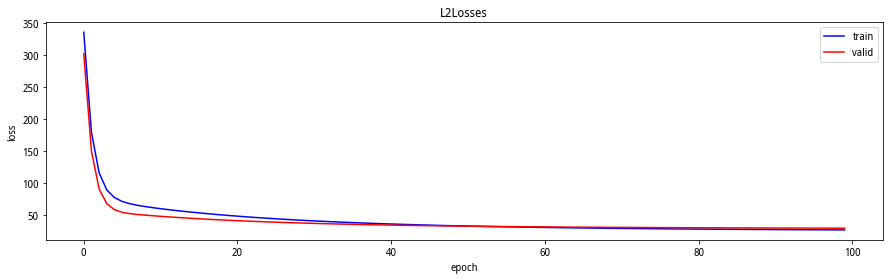

In [7]:
plt.figure(figsize=[15,4])
plt.title('L2Losses')
plt.plot(losses_train, c='b', label='train')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(losses_val, c='r', label='valid')
plt.legend()
plt.savefig('sgd-losses.png')
plt.show()

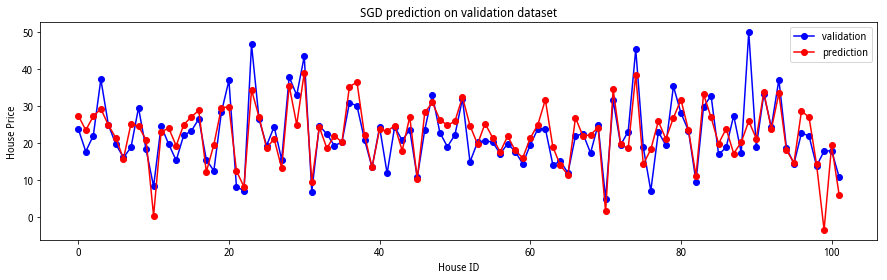

In [9]:
plt.figure(figsize=[15,4])
plt.title('SGD prediction on validation dataset')
plt.xlabel('House ID')
plt.ylabel('House Price')
plt.plot(y_val, marker='o', c='b', label='validation')
plt.plot(X_val.dot(w), marker='o', c='r', label='prediction')
plt.legend()
plt.savefig('images/sgd-prediction.png')
plt.show()